In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

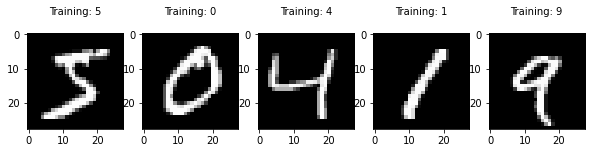

In [21]:
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):  #enumerate is like a counter 
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Training: ​​​​​​{}\n'.format(label), fontsize =10)

In [17]:
#Convert data from integers to floating-point numbers (between 0 and 1)
x_train, x_test = x_train / 255.0, x_test /255.0

In [18]:
#Build the tf.keras.Sequential model by adding a layer after another
import keras 
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Dense
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [25]:
model.compile(loss='sparse_categorical_crossentropy',   #we use sparse categorical entropy
              optimizer= 'adam',
              metrics = ['accuracy']) #we want to use adam optimizer

In [30]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2077 - accuracy: 0.9394
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2003 - accuracy: 0.9423
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1917 - accuracy: 0.9441
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1859 - accuracy: 0.9459
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1808 - accuracy: 0.9481
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1763 - accuracy: 0.9492
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1708 - accuracy: 0.9497
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1653 - accuracy: 0.9522
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1626 - accuracy: 0.9530
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.157

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.9637


In [33]:
from sklearn import metrics
predictions = model.predict(x_test)
print(predictions)

#to get the classes:
classes = np.argmax(predictions, axis = 1)
print(classes)

[[2.0036641e-06 3.6439116e-09 4.8956816e-05 ... 9.9811351e-01
  9.0810727e-07 3.2907163e-05]
 [2.1454149e-05 2.8358409e-04 9.9859649e-01 ... 6.1176417e-13
  1.4573913e-04 1.5993683e-13]
 [1.2082522e-06 9.9278814e-01 1.1700938e-03 ... 2.3193599e-03
  2.6753012e-03 1.3600152e-05]
 ...
 [1.3607342e-10 1.3755050e-08 3.5456459e-08 ... 9.2474489e-05
  2.4985572e-04 3.5530308e-03]
 [6.0907587e-07 5.7204811e-06 2.2531735e-08 ... 4.2527059e-08
  8.0888001e-03 6.7314566e-08]
 [3.4012803e-06 7.3241690e-12 8.4572253e-05 ... 5.2283629e-11
  1.9413208e-06 4.9639994e-09]]
[7 2 1 ... 4 5 6]


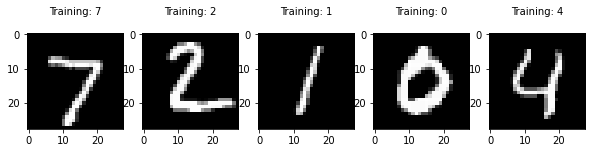

In [35]:
#visualize
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):  #enumerate is like a counter 
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Training: ​​​​​​{}\n'.format(label), fontsize =10)

Text(0.5, 1.0, 'Accuracy = 0.963699996471405')

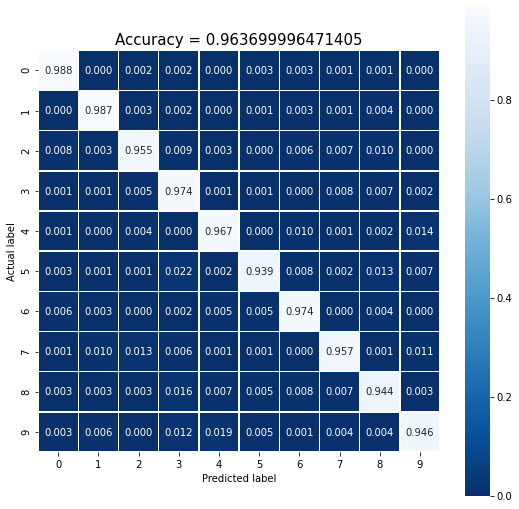

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, classes, normalize='true')
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy = {0}'.format(accuracy)
plt.title(all_sample_title, size=15)

In [43]:
#callbacks : a callback performs actions at various stages of training 
#eg Early Stopping

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss',patience=5) 
#patience = the number of epochs to wait before stopping

#we want to save the best model, e.g. 5 echos before it stopped
callbacks = [early_stopping, ModelCheckpoint(filepath='best_model.h5', 
                                             monitor= 'val_loss',
                                             save_best_only=True)] 
history = model.fit(x_train, 
                    y_train, 
                    epochs=200, 
                    validation_split=0.25, 
                    batch_size=40, 
                    verbose=2, 
                    callbacks = [callbacks])

Epoch 1/200
1125/1125 - 4s - loss: 0.1352 - accuracy: 0.9604 - val_loss: 0.1075 - val_accuracy: 0.9699
Epoch 2/200
1125/1125 - 3s - loss: 0.1335 - accuracy: 0.9610 - val_loss: 0.1067 - val_accuracy: 0.9699
Epoch 3/200
1125/1125 - 4s - loss: 0.1333 - accuracy: 0.9614 - val_loss: 0.1065 - val_accuracy: 0.9695
Epoch 4/200
1125/1125 - 3s - loss: 0.1296 - accuracy: 0.9636 - val_loss: 0.1062 - val_accuracy: 0.9699
Epoch 5/200
1125/1125 - 3s - loss: 0.1275 - accuracy: 0.9629 - val_loss: 0.1061 - val_accuracy: 0.9689
Epoch 6/200
1125/1125 - 3s - loss: 0.1255 - accuracy: 0.9634 - val_loss: 0.1061 - val_accuracy: 0.9687
Epoch 7/200
1125/1125 - 4s - loss: 0.1254 - accuracy: 0.9636 - val_loss: 0.1043 - val_accuracy: 0.9695
Epoch 8/200
1125/1125 - 3s - loss: 0.1220 - accuracy: 0.9638 - val_loss: 0.1043 - val_accuracy: 0.9699
Epoch 9/200
1125/1125 - 3s - loss: 0.1211 - accuracy: 0.9647 - val_loss: 0.1034 - val_accuracy: 0.9693
Epoch 10/200
1125/1125 - 4s - loss: 0.1201 - accuracy: 0.9650 - val_loss: